# Rapid proteomic analysis for solid tumors reveals LSD1 as a drug target in an end‐stage cancer patient
#### Doll et al. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/

### Abstract
Recent advances in mass spectrometry (MS)‐based technologies are now set to transform translational cancer proteomics from an idea to a practice. Here, we present a robust proteomic workflow for the analysis of clinically relevant human cancer tissues that allows quantitation of thousands of tumor proteins in several hours of measuring time and a total turnaround of a few days. We applied it to a chemorefractory metastatic case of the extremely rare urachal carcinoma. Quantitative comparison of lung metastases and surrounding tissue revealed several significantly upregulated proteins, among them lysine‐specific histone demethylase 1 (LSD1/KDM1A). LSD1 is an epigenetic regulator and the target of active development efforts in oncology. Thus, clinical cancer proteomics can rapidly and efficiently identify actionable therapeutic options. While currently described for a single case study, we envision that it can be applied broadly to other patients in a similar condition.

### Workflow

![Figure 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/bin/MOL2-12-1296-g002.jpg)

**Figure 2** Proteomics workflow for the case study. (A) Timeline of the project. (B) Experimental design, including source of material, inStageTip sample preparation, and depiction of the analytical workflow


### Results

![Figure 3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/bin/MOL2-12-1296-g003.jpg)

**Figure 3** Proteins differentially expressed in the urachal carcinoma lung metastases. (A) Volcano plot of the p‐values (y‐axis) vs. the log2 protein abundance differences (x‐axis) between metastases and control, with lines of significance colored in black or gray lines corresponding to a 5% or 1% FDR, respectively. (B) Mechanisms of action of LSD1/KDM1A and inhibitory drug treatment proposed: **JATROSOME. TRANYLCYPROMIN**


### Workflow with the Clinical Knowledge Graph

1. Generate Analysis Report: Proteomics data
2. Identify Candidate Drug Treatments
3. Rank Candidates According to Toxicity

![Clinical_Knowledge_Graph](banner.jpg)

## Generate Analysis Report: Proteomics Data

### Report Manager

In [91]:
from report_manager import project

##### We load specific configuration for this project.

In [92]:
configuration_files = {"proteomics":"/Users/albertosantos/Development/Clinical_Proteomics_Department/ClinicalKnowledgeGraph(CKG)/code/src/report_manager/config/proteomics_CS.yml"}

##### We create a new project object that we can use to run the analyses

In [93]:
study_case_project = project.Project(identifier="P0000002", configuration_files=configuration_files, datasets={}, knowledge=None, report={})

##### We need to first build the project. This step will collect the project datasets from CKG and process them

In [94]:
study_case_project.build_project(force=False)

##### We can now generate the report following the specified configuration

In [95]:
study_case_project.generate_report()

##### We can access the project report

In [96]:
study_case_project.show_report(environment='notebook')

defaultdict(list,
            {'PROJECT INFORMATION': [],
             'PROTEOMICS': [],
             'WES': [],
             'MULTIOMICS': [],
             'KNOWLEDGE GRAPH': []})

##### Ready! All the analyses are done and we can now access to all the results for each data type

In [97]:
study_case_project.list_datasets()

dict_keys(['multiomics', 'wes', 'proteomics'])

##### We will use the results from the proteomics analyses. We access the dataset 'proteomics' for further analysis.

In [98]:
proteomics_dataset = study_case_project.get_dataset(dataset='proteomics')

##### The available analysis for this dataset are:

In [99]:
proteomics_dataset.list_dataframes()

['go annotation',
 'number of modified proteins',
 'number of peptides',
 'number of proteins',
 'original',
 'pathway annotation',
 'processed',
 'protein biomarkers',
 'regulated',
 'regulation table',
 'tissue qcmarkers']

###### In this case, we use the regulation table to extract proteins upregulated in the metastatic tissue compare to non-cancerous tissue.

In [100]:
regulation_table = proteomics_dataset.get_dataframe(dataset_name='regulation table')

In [101]:
regulation_table.head()

-log10 pvalue        FC                 Method  T-statistics  \
0       0.487413 -1.277214  SAMR Two class paired      0.153337   
1       1.438878  3.610003  SAMR Two class paired     -0.924233   
2       3.001177 -1.926524  SAMR Two class paired      0.463202   
3       1.192262  2.801113  SAMR Two class paired     -0.594485   
4       0.321607 -1.786332  SAMR Two class paired      0.346611   

                   correction  dfk  dfn  effsize efftype  group1  ...  \
0  permutation FDR (4.0 perm)    1    2   -0.738  hedges  CANCER  ...   
1  permutation FDR (4.0 perm)    1    2    2.913  hedges  CANCER  ...   
2  permutation FDR (4.0 perm)    1    2  -18.081  hedges  CANCER  ...   
3  permutation FDR (4.0 perm)    1    2    2.145  hedges  CANCER  ...   
4  permutation FDR (4.0 perm)    1    2   -0.496  hedges  CANCER  ...   

    identifier log2FC  mean(group1)  mean(group2)      padj    pvalue  \
0  A1BG~P04217 -0.353        31.710        32.063  0.714951  0.325527   
1  A1CF~Q9NQ94  1.852        26.563        24.711  0.052925  0.036402   
2   A2M~P01023 -0.946        34.287        35.233  0.271411  0.000997   
3  AAAS~Q9NRG9  1.486        26.317        24.831  0.149537  0.064230   
4  AACS~Q86V21 -0.837        26.350        27.187  0.423692  0.476862   

   rejected  s0  std(group1)  std(group2)  
0     False   2        0.047        0.384  
1     False   2        0.360        0.366  
2     False   2        0.033        0.026  
3     False   2        0.173        0.532  
4     False   2        0.625        1.211  

[5 rows x 21 columns]

In [102]:
regulation_table[regulation_table['identifier']=='HDAC1~Q13547']

-log10 pvalue         FC                 Method  T-statistics  \
1885       0.782856  10.367528  SAMR Two class paired     -1.008813   

                      correction  dfk  dfn  effsize efftype  group1  ...  \
1885  permutation FDR (4.0 perm)    1    2    1.227  hedges  CANCER  ...   

        identifier log2FC  mean(group1)  mean(group2)      padj    pvalue  \
1885  HDAC1~Q13547  3.374        30.666        27.292  0.036735  0.164871   

      rejected  s0  std(group1)  std(group2)  
1885      True   2        0.301        2.201  

[1 rows x 21 columns]

##### As in the article, we use significantly regulated proteins with a fold change higher than two.

In [103]:
up_regulated_proteins = regulation_table.loc[(regulation_table.rejected) & (regulation_table.FC > 2), ['identifier']]

In [104]:
up_regulated_proteins.shape

(199, 1)

In [105]:
'HDAC1~Q13547' in up_regulated_proteins['identifier'].tolist()

True

### Graph Database Connector

In [106]:
from graphdb_connector import query_utils, connector

##### We connect to CKG database using the default configuration

In [107]:
driver = connector.getGraphDatabaseConnectionConfiguration()

##### We load the existing database queries that we can use to extract knowledge from CKG

In [108]:
queries = query_utils.read_knowledge_queries()

### 1) Filter for Regulated Proteins Associated to Lung Cancer:

##### We want to check whether we can identify known connection between the upregulated proteins in metastases and the disease
##### We check if there are queries for these node types: Protein, Disease

In [109]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Protein", "Disease"], print_pretty=True)

In [110]:
selected_queries.head()

Name  \
id                                                                             
Disease                    associated diseases in at least two of the pro...   
association_disease_score                                   specific disease   

                                                                 Description  \
id                                                                             
Disease                    get relationships to diseases from a list of p...   
association_disease_score  Return the list of proteins associated to a sp...   

                            involved_nodes    involved_rels  \
id                                                            
Disease                    Protein,Disease  ASSOCIATED_WITH   
association_disease_score  Protein,Disease  ASSOCIATED_WITH   

                                                                       query  \
id                                                                             
Disease                    MATCH (project:Project)-[:STUDIES_DISEASE]-(d:...   
association_disease_score  MATCH (protein:Protein)-[r]-(disease:Disease) ...   

                                                                     example  
id                                                                            
Disease                                                                       
association_disease_score  proteins = ['A1BG~P04217','A2M~P01023','ACACB~...

##### The query named 'specific disease' can help us in this case

In [111]:
disease_query = selected_queries.loc["association_disease_score", "query"]
proteins = ['"{}"'.format(p) for p in up_regulated_proteins["identifier"].tolist()]
diseases = ['DOID:1324']
diseases = ['"{}"'.format(d) for d in diseases]
disease_query = disease_query.format(",".join(proteins),",".join(diseases), 1)

In [114]:
proteins_associated_lung_cancer = connector.getCursorData(driver=driver, query=disease_query, parameters={})

In [115]:
proteins_associated_lung_cancer.head()

node1        node2    source             type  weight
0      CPQ~Q9Y646  lung cancer  DISEASES  ASSOCIATED_WITH   1.034
1  CEACAM6~P40199  lung cancer  DISEASES  ASSOCIATED_WITH   1.350
2     AGR2~O95994  lung cancer  DISEASES  ASSOCIATED_WITH   1.133
3    THBS1~P07996  lung cancer  DISEASES  ASSOCIATED_WITH   1.263
4    KDM1A~O60341  lung cancer  DISEASES  ASSOCIATED_WITH   1.346

In [116]:
proteins_associated_lung_cancer.shape

(20, 5)

### 2) Identify Inhibitory Drugs for those Proteins

##### We use again the functionality 'find_queries_involving_nodes' to find queries involving nodes: Protein, Drug

In [117]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Protein", "Drug"], print_pretty=True)

In [118]:
selected_queries.head()

Name  \
id                                                                                          
Drug                                    associated drugs in at least two of the protei...   
association_drug_intervention_proteins             drug intervention- protein association   
association_drug_interaction_score                           drug interaction association   

                                                                              Description  \
id                                                                                          
Drug                                    get relationships to drugs. Limit the result t...   
association_drug_intervention_proteins  Return associations between a list of proteins...   
association_drug_interaction_score      Return the list of drugs associated to the lis...   

                                                                involved_nodes  \
id                                                                               
Drug                                                              Protein,Drug   
association_drug_intervention_proteins  Project,Protein,Clinical_variable,Drug   
association_drug_interaction_score                                Protein,Drug   

                                                   involved_rels  \
id                                                                 
Drug                                                     ACTS_ON   
association_drug_intervention_proteins  HAD_INTERVENTION,ACTS_ON   
association_drug_interaction_score                       ACTS_ON   

                                                                                    query  \
id                                                                                          
Drug                                    MATCH (protein:Protein)-[r:ACTS_ON]-(drug:Drug...   
association_drug_intervention_proteins  MATCH (project:Project)-[]-()-[:HAD_INTERVENTI...   
association_drug_interaction_score      MATCH (protein:Protein)-[r]-(drug:Drug) WHERE ...   

                                                                                  example  
id                                                                                         
Drug                                                                                       
association_drug_intervention_proteins  project_id = 'P0000002'\nproteins = ['A1BG~P04...  
association_drug_interaction_score      proteins = ['A1BG~P04217','A2M~P01023','ACACB~...

In [119]:
proteins = ['"{}"'.format(p) for p in proteins_associated_lung_cancer['node1'].tolist()]
drug_query = selected_queries.loc["association_drug_interaction_score", "query"].format(",".join(proteins), 'inhibition', 0.8)

##### We search in CKG database for known inhibitory drugs for these proteins

In [120]:
drugs_proposed = connector.getCursorData(driver=driver, query=drug_query, parameters={})

In [121]:
drugs_proposed.head()

Drug_desc      action  drug_id  \
0  A major primary bile acid produced in the live...  inhibition  DB02659   
1  A synthetic nonsteroidal estrogen used in the ...  inhibition  DB00255   
2  Ketamine is an NMDA receptor antagonist with a...  inhibition  DB01221   
3  Sorafenib (rINN), marketed as Nexavar by Bayer...  inhibition  DB00398   
4  Nicotine is highly toxic alkaloid. It is the p...  inhibition  DB00184   

         node1               node2  source     type  weight  
0  CDH1~P12830         Cholic Acid  STITCH  ACTS_ON   0.957  
1  CDH1~P12830  Diethylstilbestrol  STITCH  ACTS_ON   0.800  
2  CDH1~P12830            Ketamine  STITCH  ACTS_ON   0.800  
3  CDH1~P12830           Sorafenib  STITCH  ACTS_ON   0.800  
4  CDH1~P12830            Nicotine  STITCH  ACTS_ON   0.800

In [122]:
drugs_proposed.shape

(36, 8)

##### These list of inhibitory drugs could in principle be used to identify alternative treatments
#### We can already see that CKG found the same inhibitory drug that was identified in the study case published. However, many other options are proposed and could be further ranked using other criteria.

In [123]:
from analytics_core import utils
from analytics_core.viz import viz

In [124]:
net = viz.get_network(data=drugs_proposed, identifier="inhibition_drugs", args={"source":"node1", "target":"node2", "values":"weight", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [125]:
viz.visualize_notebook_network(net["notebook"], notebook_type='jupyter', layout={'width':'100%', 'height':'700px'})

Cytoscape(data={'elements': [{'data': {'degree': 7, 'betweenness': 0.021212121212121213, 'eigenvector': '-0.00…

In [126]:
utils.json_network_to_gml(net['net_json'], path='drug_network.gml')

##### One possible step to reduce the list would be to use a more stringent cutoff when choosing inhibitory drugs. For instance, a cutoff of 0.9 would provide a candidate list with higher confidence.

In [127]:
proteins = ['"{}"'.format(p) for p in proteins_associated_lung_cancer['node1'].tolist()]
drug_query = queries["association_drug_interaction_score"]["query"].format(",".join(proteins), 'inhibition', 0.9)

##### We search again in CKG database for known inhibitory drugs for these proteins

In [128]:
drugs_proposed = connector.getCursorData(driver=driver, query=drug_query, parameters={})

In [129]:
drugs_proposed.head()

Drug_desc      action  drug_id  \
0  A major primary bile acid produced in the live...  inhibition  DB02659   
1  Paclitaxel is a mitotic inhibitor used in canc...  inhibition  DB01229   
2  Calcitriol or 1,25-dihydroxycholecalciferol (a...  inhibition  DB00136   
3  Vorinostat (rINN) or suberoylanilide hydroxami...  inhibition  DB02546   
4                                               None  inhibition  DB04297   

          node1                                              node2  source  \
0   CDH1~P12830                                        Cholic Acid  STITCH   
1   CDH1~P12830                                         Paclitaxel  STITCH   
2  CDH17~Q12864                                         Calcitriol  STITCH   
3  HDAC1~Q13547                                         Vorinostat  STITCH   
4  HDAC1~Q13547  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  STITCH   

      type  weight  
0  ACTS_ON   0.957  
1  ACTS_ON   0.957  
2  ACTS_ON   0.957  
3  ACTS_ON   0.987  
4  ACTS_ON   0.938

In [130]:
drugs_proposed.shape

(9, 8)

##### The list is now shorter but contain only high confidence results

In [131]:
net = viz.get_network(data=drugs_proposed, identifier="inhibition_drugs", args={"source":"node1", "target":"node2", "values":"weight", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [132]:
viz.visualize_notebook_network(net["notebook"], notebook_type='jupyter', layout={'width':'100%', 'height':'700px'})

Cytoscape(data={'elements': [{'data': {'degree': 2, 'betweenness': 0.009523809523809525, 'eigenvector': '0.445…

In [133]:
utils.json_network_to_gml(net['net_json'], path='drug_network_reduced.gml')

### 3) Identify Proposed Drug's Known Side Effects

##### In the case study, toxicity was in part the reason why the treatment regimens did not work. We could use the list of side effects to prioritize these drugs.

##### Let's find database queries to obtain these associations: Phenotype (side effect), Drug.

In [134]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Phenotype", "Drug"], print_pretty=True)

In [135]:
selected_queries.head()

Name  \
id                                                           
association_drug_sideeffects  drug side effect association   

                                                                  Description  \
id                                                                              
association_drug_sideeffects  Return the list of side effects linked to drugs   

                              involved_nodes    involved_rels  \
id                                                              
association_drug_sideeffects  Phenotype,Drug  ASSOCIATED_WITH   

                                                                          query  \
id                                                                                
association_drug_sideeffects  MATCH (sideeffect:Phenotype)-[r]-(drug:Drug) W...   

                                                                        example  
id                                                                               
association_drug_sideeffects  drugs = ['DB00439', 'DB06196']\ndrug_side_effe...

In [136]:
drugs = drugs_proposed["drug_id"].unique()
drugs = ['"{}"'.format(d) for d in drugs]
sideeffects_query = selected_queries.loc["association_drug_sideeffects", "query"].format(",".join(drugs))

In [137]:
side_effects = connector.getCursorData(driver=driver, query=sideeffects_query, parameters={})

In [138]:
side_effects.head()

node1                    node2 source             type
0  Vorinostat             Hyperkinesis  SIDER  HAS_SIDE_EFFECT
1  Vorinostat            Poor appetite  SIDER  HAS_SIDE_EFFECT
2  Vorinostat               Xerostomia  SIDER  HAS_SIDE_EFFECT
3  Vorinostat  Squamous cell carcinoma  SIDER  HAS_SIDE_EFFECT
4  Vorinostat                 Headache  SIDER  HAS_SIDE_EFFECT

In [139]:
side_effects.groupby('node1')['node2'].count()

node1
Atorvastatin    158
Bumetanide       41
Calcitriol       59
Cholic Acid       7
Paclitaxel      228
Vorinostat       42
Name: node2, dtype: int64

In [140]:
net = viz.get_network(data=side_effects, identifier="side_effects", args={"source":"node1", "target":"node2", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [141]:
utils.json_network_to_gml(net['net_json'], path='side_effects.gml')

In [142]:
no_registerd_side_effects = list(set(drugs_proposed['node2'].tolist()).difference(side_effects['node1'].tolist()))

In [143]:
no_registerd_side_effects

['dATP',
 'Resveratrol',
 '7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide']

### 4) Reduce Adverse Response

##### The treatment regimens are also available in CKG and their side effects can be used to rank the proposed drugs. We can prioritize drugs with side effects dissimilar to the ones that caused an adverse reaction in the patient.

##### We will in this case define a new query to obtain the treatment intervention

In [144]:
treatment_intervention_query ='MATCH (project:Project)-[:HAS_ENROLLED]-(subject:Subject)-[r:HAD_INTERVENTION]-(treatment:Clinical_variable) WHERE project.id="P0000002" AND r.type="drug treatment" RETURN treatment.name AS treatment'

In [145]:
treatment_regimens = connector.getCursorData(driver=driver, query=treatment_intervention_query, parameters={})

In [146]:
treatment_regimens

treatment
0  Folinic acid
1  Capecitabine
2   Oxaliplatin
3  Fluorouracil
4  Capecitabine
5  Fluorouracil
6  Folinic acid
7   Oxaliplatin

##### We have defined a default query that can be used to calculate Jaccard similarity between two lists of drug treatments. In this case, we can use this query to obtain similarities between side effects from the treatment regimen and the proposed alternative drugs.

In [147]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Clinical_variable", "Drug"], print_pretty=True)

In [148]:
selected_queries.head()

Name  \
id                                                                                           
association_drug_intervention_proteins              drug intervention- protein association   
side_effects_jaccard_similarity_intervention_pr...         similarity between side effects   

                                                                                          Description  \
id                                                                                                      
association_drug_intervention_proteins              Return associations between a list of proteins...   
side_effects_jaccard_similarity_intervention_pr...  Return the jaccard similarity between drugs us...   

                                                                            involved_nodes  \
id                                                                                           
association_drug_intervention_proteins              Project,Protein,Clinical_variable,Drug   
side_effects_jaccard_similarity_intervention_pr...                  Drug,Clinical_variable   

                                                               involved_rels  \
id                                                                             
association_drug_intervention_proteins              HAD_INTERVENTION,ACTS_ON   
side_effects_jaccard_similarity_intervention_pr...           HAS_SIDE_EFFECT   

                                                                                                query  \
id                                                                                                      
association_drug_intervention_proteins              MATCH (project:Project)-[]-()-[:HAD_INTERVENTI...   
side_effects_jaccard_similarity_intervention_pr...  MATCH (d1:Drug)-[:HAS_SIDE_EFFECT]->(phenotype...   

                                                                                              example  
id                                                                                                     
association_drug_intervention_proteins              project_id = 'P0000002'\nproteins = ['A1BG~P04...  
side_effects_jaccard_similarity_intervention_pr...  intervention = ['Capecitabine', 'Fluorouracil'...

In [149]:
drugs_proposed

Drug_desc      action  drug_id  \
0  A major primary bile acid produced in the live...  inhibition  DB02659   
1  Paclitaxel is a mitotic inhibitor used in canc...  inhibition  DB01229   
2  Calcitriol or 1,25-dihydroxycholecalciferol (a...  inhibition  DB00136   
3  Vorinostat (rINN) or suberoylanilide hydroxami...  inhibition  DB02546   
4                                               None  inhibition  DB04297   
5  Resveratrol (3,5,4'-trihydroxystilbene) is a p...  inhibition  DB02709   
6                     A sulfamyl diuretic. [PubChem]  inhibition  DB00887   
7                                               None  inhibition  DB03222   
8  Atorvastatin (Lipitor) is a member of the drug...  inhibition  DB01076   

            node1                                              node2  source  \
0     CDH1~P12830                                        Cholic Acid  STITCH   
1     CDH1~P12830                                         Paclitaxel  STITCH   
2    CDH17~Q12864                                         Calcitriol  STITCH   
3    HDAC1~Q13547                                         Vorinostat  STITCH   
4    HDAC1~Q13547  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  STITCH   
5    PTGES~O14684                                        Resveratrol  STITCH   
6  SLC12A2~P55011                                         Bumetanide  STITCH   
7      TXN~P10599                                               dATP  STITCH   
8    THBS1~P07996                                       Atorvastatin  STITCH   

      type  weight  
0  ACTS_ON   0.957  
1  ACTS_ON   0.957  
2  ACTS_ON   0.957  
3  ACTS_ON   0.987  
4  ACTS_ON   0.938  
5  ACTS_ON   0.957  
6  ACTS_ON   0.991  
7  ACTS_ON   0.900  
8  ACTS_ON   0.957

In [150]:
treatment_list = ['"{}"'.format(t) for t in treatment_regimens['treatment'].tolist()]
proposed_list = ['"{}"'.format(t) for t in drugs_proposed["drug_id"].unique()]
q = selected_queries.loc['side_effects_jaccard_similarity_intervention_proposed_drugs', 'query'].replace("INTERVENTION",",".join(treatment_list)).replace("DRUG",",".join(proposed_list))
similarity = connector.getCursorData(driver=driver, query=q, parameters={})

In [151]:
similarity = similarity[(similarity['from'].isin(treatment_regimens['treatment'].tolist())) & (similarity['to'].isin(side_effects['node1'].unique().tolist()))]
similarity = similarity.groupby('to').mean().sort_values(by='similarity')

In [152]:
similarity

intersection  similarity
to                                    
Cholic Acid       6.000000    0.038710
Bumetanide       20.666667    0.126908
Calcitriol       25.333333    0.152324
Vorinostat       29.000000    0.174699
Atorvastatin     61.666667    0.268231
Paclitaxel      100.666667    0.376055

##### We could initially set a cutoff and further prioritize the reduced list

In [153]:
similarity = similarity[similarity['similarity']<0.2]

In [154]:
similarity

intersection  similarity
to                                   
Cholic Acid      6.000000    0.038710
Bumetanide      20.666667    0.126908
Calcitriol      25.333333    0.152324
Vorinostat      29.000000    0.174699

### 5) Check in Literature Known Links Between Disease and Drugs

##### Drugs that are already known to be have enhancing antitumor effects in primary or metastatic lung cancer could be used as well to prioritize the candidate drugs.

In [155]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Disease", "Drug"], print_pretty=True)

In [156]:
selected_queries.head()

Name  \
id                                                                                                  
association_drug_disease_publication                drug co-mentioned with disease in publication   
association_combination_drug_disease_publication  combinations of drugs co-mentioned with disease   

                                                                                        Description  \
id                                                                                                    
association_drug_disease_publication              Return the list of publications co-mentioning ...   
association_combination_drug_disease_publication  Return the list of publications co-mentioning ...   

                                                            involved_nodes  \
id                                                                           
association_drug_disease_publication              Drug,Disease,Publication   
association_combination_drug_disease_publication  Drug,Disease,Publication   

                                                             involved_rels  \
id                                                                           
association_drug_disease_publication              MENTIONED_IN_PUBLICATION   
association_combination_drug_disease_publication  MENTIONED_IN_PUBLICATION   

                                                                                              query  \
id                                                                                                    
association_drug_disease_publication              MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]...   
association_combination_drug_disease_publication  MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]...   

                                                                                            example  
id                                                                                                   
association_drug_disease_publication              drugs = ['DB00439', 'DB06196']\ndisease  = ['D...  
association_combination_drug_disease_publication  drugs = ['DB00439', 'DB06196']\ndisease  = ['D...

In [157]:
reduced_drug_list = drugs_proposed.loc[drugs_proposed["node2"].isin(similarity.index.tolist() + no_registerd_side_effects), "drug_id"]
reduced_drug_list = ['"{}"'.format(d) for d in reduced_drug_list]
drug_disease_query = selected_queries.loc['association_drug_disease_publication', 'query'].format(",".join(reduced_drug_list),",".join(diseases))

In [158]:
drugs_publications = connector.getCursorData(driver=driver, query=drug_disease_query, parameters={})

In [159]:
drugs_publications.head()

Year                                       linkout  \
0  2018  https://www.ncbi.nlm.nih.gov/pubmed/30584449   
1  2018  https://www.ncbi.nlm.nih.gov/pubmed/30591928   
2  2011  https://www.ncbi.nlm.nih.gov/pubmed/21464799   
3  2018  https://www.ncbi.nlm.nih.gov/pubmed/30537988   
4  2018  https://www.ncbi.nlm.nih.gov/pubmed/30537988   

                                               node1          node2  \
0                                        Resveratrol  PMID:30584449   
1                                         Calcitriol  PMID:30591928   
2                                        Resveratrol  PMID:21464799   
3                                         Vorinostat  PMID:30537988   
4  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  PMID:30537988   

                       type  
0  MENTIONED_IN_PUBLICATION  
1  MENTIONED_IN_PUBLICATION  
2  MENTIONED_IN_PUBLICATION  
3  MENTIONED_IN_PUBLICATION  
4  MENTIONED_IN_PUBLICATION

In [160]:
net = viz.get_network(data=drugs_publications, identifier="drugs_publications", args={"source":"node1", "target":"node2", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [161]:
utils.json_network_to_gml(net['net_json'], path='drugs_publications.gml')

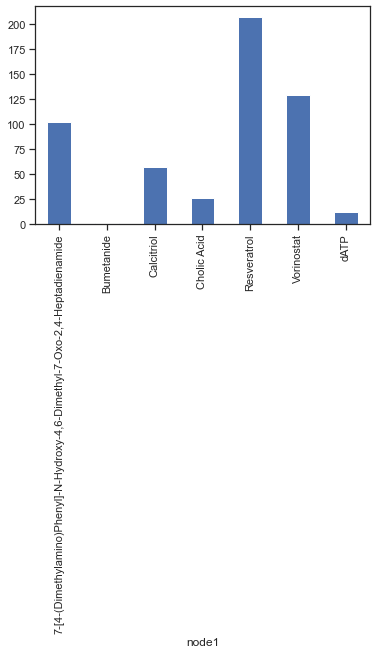

In [162]:
drugs_publications.groupby('node1')["node2"].count().plot.bar();

##### We could also check whether combinations of drugs among the shorted list have been previouly used (co-mentioned in the literature)

In [163]:
drug_combinations_query = selected_queries.loc['association_combination_drug_disease_publication', 'query'].format(",".join(reduced_drug_list),",".join(reduced_drug_list),",".join(reduced_drug_list))


In [164]:
selected_queries.loc['association_combination_drug_disease_publication', 'query']

'MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]-(publication:Publication) WHERE (drug.id IN [{}]) WITH publication, count(r) AS r_count WHERE r_count>1 MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]-(publication)-[:MENTIONED_IN_PUBLICATION]-(drug2:Drug) WHERE (drug.id IN [{}]) AND drug2.id IN [{}] AND drug.id<>drug2.id RETURN (drug.name +", "+drug2.name) AS node1, publication.id AS node2, publication.linkout AS linkout, publication.year as Year, type(r) AS type\n'

In [165]:
drugs_combinations = connector.getCursorData(driver=driver, query=drug_combinations_query, parameters={})

In [166]:
drugs_combinations.head()

Year                                       linkout  \
0  2016  https://www.ncbi.nlm.nih.gov/pubmed/27317342   
1  2016  https://www.ncbi.nlm.nih.gov/pubmed/27317342   
2  2016  https://www.ncbi.nlm.nih.gov/pubmed/27159275   
3  2016  https://www.ncbi.nlm.nih.gov/pubmed/27159275   
4  2014  https://www.ncbi.nlm.nih.gov/pubmed/25110576   

                                               node1     node2  \
0                            Vorinostat, Resveratrol  27317342   
1                            Resveratrol, Vorinostat  27317342   
2  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  27159275   
3  Resveratrol, 7-[4-(Dimethylamino)Phenyl]-N-Hyd...  27159275   
4  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  25110576   

                       type  
0  MENTIONED_IN_PUBLICATION  
1  MENTIONED_IN_PUBLICATION  
2  MENTIONED_IN_PUBLICATION  
3  MENTIONED_IN_PUBLICATION  
4  MENTIONED_IN_PUBLICATION

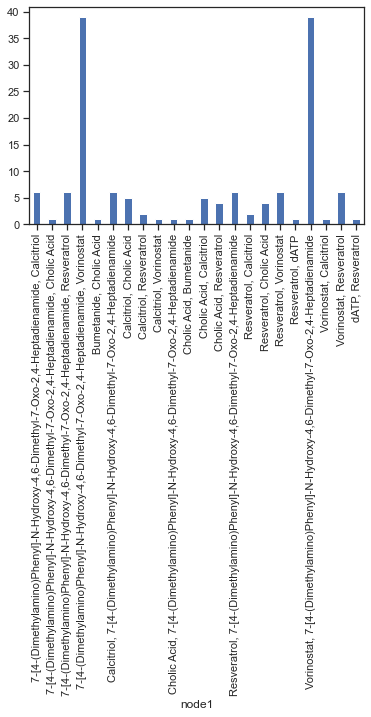

In [167]:
drugs_combinations.groupby('node1')["node2"].count().plot.bar();

##### Some of these combination therapies could be considered.

### 6) Proposed Drug Candidates: 

#### - Vorinostat (https://www.drugbank.ca/drugs/DB02546) 
![Vorinostat](https://www.drugbank.ca/structures/DB02546/image.svg)

#### - 7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide (https://www.drugbank.ca/drugs/DB04297)
![7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide"](https://www.drugbank.ca/structures/DB04297/image.svg)

In [168]:
import pandas as pd
drug_result = drugs_proposed[drugs_proposed['node2'].isin(['Vorinostat', '7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide'])]
drug_result.columns = ["Drug_desc","Action","Drug_id","Protein","Drug_name","Drug_protein_source","Drug_interaction_type","Inhibition_score"]
drug_result['Side_effects'] = ";".join(side_effects[side_effects['node1']==drug_result["Drug_name"].tolist().pop()]['node2'].tolist())
drug_result['Publications'] = ";".join(drugs_publications[drugs_publications['node1']==drug_result['Drug_name'].tolist().pop()]['node2'].tolist())
protein_result = proteins_associated_lung_cancer[proteins_associated_lung_cancer['node1']==drug_result["Protein"].tolist().pop()]
protein_result.columns = ["Protein", "Disease", "Protein_disease_source", "Protein_disease_association_type", "Disease_score"]
result = pd.merge(drug_result, protein_result, on='Protein')
result = result[["Protein", "Disease", 
                 "Protein_disease_source", "Protein_disease_association_type", 
                 "Disease_score", "Drug_name", "Drug_id", "Drug_desc", "Action", "Drug_protein_source","Drug_interaction_type","Inhibition_score",
                 "Side_effects", "Publications"
                ]]

In [169]:
result

Protein      Disease Protein_disease_source  \
0  HDAC1~Q13547  lung cancer               DISEASES   
1  HDAC1~Q13547  lung cancer               DISEASES   

  Protein_disease_association_type  Disease_score  \
0                  ASSOCIATED_WITH           1.58   
1                  ASSOCIATED_WITH           1.58   

                                           Drug_name  Drug_id  \
0                                         Vorinostat  DB02546   
1  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  DB04297   

                                           Drug_desc      Action  \
0  Vorinostat (rINN) or suberoylanilide hydroxami...  inhibition   
1                                               None  inhibition   

  Drug_protein_source Drug_interaction_type  Inhibition_score Side_effects  \
0              STITCH               ACTS_ON             0.987                
1              STITCH               ACTS_ON             0.938                

                                        Publications  
0  PMID:30537988;PMID:30365137;PMID:30214285;PMID...  
1  PMID:30537988;PMID:30365137;PMID:30214285;PMID...

In [170]:
regulation_result = regulation_table[regulation_table["identifier"]==drug_result["Protein"].tolist().pop()]
regulation_result

-log10 pvalue         FC                 Method  T-statistics  \
1885       0.782856  10.367528  SAMR Two class paired     -1.008813   

                      correction  dfk  dfn  effsize efftype  group1  ...  \
1885  permutation FDR (4.0 perm)    1    2    1.227  hedges  CANCER  ...   

        identifier log2FC  mean(group1)  mean(group2)      padj    pvalue  \
1885  HDAC1~Q13547  3.374        30.666        27.292  0.036735  0.164871   

      rejected  s0  std(group1)  std(group2)  
1885      True   2        0.301        2.201  

[1 rows x 21 columns]

### References

- http://disease-ontology.org/
- http://stitch.embl.de/
- https://www.ncbi.nlm.nih.gov/pubmed/
- http://sideeffects.embl.de/
- https://www.drugbank.ca
- https://cytoscape.org/

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/
- https://neo4j.com/